In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

In [2]:
df=pd.read_csv('./coffee.csv')

In [3]:
df.head()

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
df.shape

(1319, 44)

In [5]:
df.isnull().sum()

ID                          7
Species                     0
Owner                       9
Country.of.Origin           3
Farm.Name                 358
Lot.Number               1043
Mill                      312
ICO.Number                150
Company                   214
Altitude                  227
Region                     62
Producer                  235
Number.of.Bags              5
Bag.Weight                  5
In.Country.Partner          5
Harvest.Year               53
Grading.Date                6
Owner.1                    14
Variety                   209
Processing.Method         160
Aroma                       8
Flavor                     10
Aftertaste                 10
Acidity                    10
Body                       10
Balance                    10
Uniformity                 10
Clean.Cup                  12
Sweetness                  11
Cupper.Points              11
Total.Cup.Points           11
Moisture                   11
Category.One.Defects       11
Quakers   

## Cleaning data

In [6]:
df['Grading.Date'].value_counts()

July 11th, 2012         25
December 26th, 2013     24
June 6th, 2012          19
August 30th, 2012       18
July 26th, 2012         15
September 27th, 2012    13
October 8th, 2015       13
March 29th, 2013        13
June 17th, 2010         12
September 17th, 2012    11
October 20th, 2017      11
December 12th, 2014     10
September 10th, 2012    10
December 18th, 2014     10
April 6th, 2016          9
September 11th, 2012     9
June 1st, 2017           9
August 16th, 2016        9
September 4th, 2012      8
November 23rd, 2014      8
November 4th, 2014       8
February 23rd, 2012      8
July 3rd, 2012           8
May 23rd, 2015           7
August 31st, 2012        7
July 17th, 2015          7
December 3rd, 2011       7
April 26th, 2014         7
May 31st, 2010           7
August 22nd, 2017        7
                        ..
June 13th, 2017          1
November 29th, 2017      1
September 7th, 2015      1
January 19th, 2018       1
July 21st, 2016          1
June 21st, 2011          1
A

In [7]:
#Nos quedamos solo con el año, para poder pasarlo a numérico
df['Grading.Date']=df['Grading.Date'].str[-4:]

In [8]:
#lo mismo que en el caso anterior
df.Expiration.value_counts()
df['Expiration']=df['Expiration'].str[-4:]

In [9]:
#convertimos las columnas en numeric
cols=['Number.of.Bags','Expiration','Grading.Date','Flavor', 'Aroma','Harvest.Year','Acidity','Aftertaste','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Total.Cup.Points','Total.Cup.Points', 'Moisture']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [10]:
df.columns

Index(['ID', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [11]:
df._get_numeric_data().head()

,Number.of.Bags,Harvest.Year,Grading.Date,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.Two.Defects,Expiration,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,300.0,2014.0,2015.0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0.0,2016.0,1950.0,2200.0,2075.0
1,300.0,2014.0,2015.0,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,1.0,2016.0,1950.0,2200.0,2075.0
2,5.0,NaN,2010.0,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0.0,2011.0,1600.0,1800.0,1700.0
3,320.0,2014.0,2015.0,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,2.0,2016.0,1800.0,2200.0,2000.0
4,300.0,2014.0,2015.0,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,2.0,2016.0,1950.0,2200.0,2075.0


In [12]:
#eliminamos filas que tengan valores nulos  en columna altitude
df.dropna(subset=['altitude_low_meters'],inplace=True)

In [13]:
# nos quedamos con la especie Arábica, que supone el 90% del dataset.eliminamos todas las filas que no sean Arábica. 
df = df[df.Species == 'Arabica']

In [14]:
#eliminamos columnas que no interesan
df.drop(['Species','Company','Farm.Name','Owner','Bag.Weight','ICO.Number','Mill','Region','Producer','Lot.Number','In.Country.Partner','Certification.Address','Certification.Contact','Owner.1','unit_of_measurement','Altitude','altitude_mean_meters','Species','ID','Quakers','Category.One.Defects','Category.Two.Defects'],axis=1,inplace=True)
#species column: el 99% son de la especie Arábica. 
#eliminamos lot.number porque el 90% de registros son nulos
# Elminamos Certification.Address,Certification.Contact porque no nos interesa
#columna Altitude y altitude_mean_meters se repite
#eliminamos 'In.Country.Partner' porque es la misma columna que CertificationBody
# Category.One.Defects,Category.Two.Defects,Quakers,unit_of_measurement  no hay buen balance.eliminamos
#eliminamos Owner.1,Producer,REgion,Company,ICO.Number,Mill,'Farm.Name',Owner porq estan demasiado disgregados
#Bag.Weight tiene libras y kg se podría pasar todo a kg y luego eliminar el string KG y pasar a numerico pero la eliminamos 

In [15]:
#eliminamos valores nulos
df.dropna(inplace=True)

In [16]:
df.Color.value_counts()

Green           634
Bluish-Green     70
Blue-Green       61
None             43
Name: Color, dtype: int64

In [17]:
#los valores nulos los añadimos a la categoría None
df['Color'].fillna('None', inplace=True)

### Dummies: columnas- Certifications, Color,Processing.Method,Variety,Country.of.origin -

In [18]:
# CON MENOS DE 100 POR CERTIFICATION LA INCLUIMOS EN OTHER

def certification(x, certifications=['AMECAFE', 'Specialty Coffee Association', 'AlmacafÃ©', 'Asociacion Nacional Del CafÃ©']):
    if x in certifications:
        return x
    else:
       return 'Other'

df['Certification.Body'] = df['Certification.Body'].apply(certification)
df['Certification.Body'].value_counts()

Other                            294
AMECAFE                          178
Asociacion Nacional Del CafÃ©    133
Specialty Coffee Association     104
AlmacafÃ©                         99
Name: Certification.Body, dtype: int64

In [19]:
# CON MENOS DE 50 POR Variety LA INCLUIMOS EN OTHER

def variety(x, var=['Caturra', 'Bourbon', 'Typica', 'Catuai']):
    if x in var:
        return x
    else:
       return 'Other'

df['Variety'] = df['Variety'].apply(variety)
df['Variety'].value_counts()

Other      206
Caturra    206
Bourbon    174
Typica     161
Catuai      61
Name: Variety, dtype: int64

In [20]:
#decidimos eliminar Other
df=df[df.Variety!='Other']

In [21]:
df['Variety'].value_counts()

Caturra    206
Bourbon    174
Typica     161
Catuai      61
Name: Variety, dtype: int64

In [22]:

# CON MENOS DE 40 POR Variety LA INCLUIMOS EN OTHER

def origin(x, countries=['Mexico', 'Colombia', 'Guatemala', 'Brazil','Taiwan','Honduras','Costa Rica']):
    if x in countries:
        return x
    else:
       return 'Other'

df['Country.of.Origin'] = df['Country.of.Origin'].apply(origin)
df['Country.of.Origin'].value_counts()

Mexico        173
Guatemala     132
Colombia       99
Other          57
Costa Rica     41
Honduras       38
Taiwan         36
Brazil         26
Name: Country.of.Origin, dtype: int64

In [23]:
#Comprobamos que ya no hay nulos
df.isnull().sum()

Country.of.Origin       0
Number.of.Bags          0
Harvest.Year            0
Grading.Date            0
Variety                 0
Processing.Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean.Cup               0
Sweetness               0
Cupper.Points           0
Total.Cup.Points        0
Moisture                0
Color                   0
Expiration              0
Certification.Body      0
altitude_low_meters     0
altitude_high_meters    0
dtype: int64

In [24]:
df.head()

,Country.of.Origin,Number.of.Bags,Harvest.Year,Grading.Date,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Color,Expiration,Certification.Body,altitude_low_meters,altitude_high_meters
21,Costa Rica,250.0,2014.0,2014.0,Caturra,Washed / Wet,8.08,8.25,8.00,8.17,...,10.0,10.0,8.33,87.17,0.11,Green,2015.0,Specialty Coffee Association,1300.0,1300.0
25,Brazil,3.0,2011.0,2011.0,Bourbon,Natural / Dry,8.50,8.50,8.00,8.00,...,10.0,10.0,7.92,86.92,0.12,Green,2012.0,Other,1250.0,1250.0
32,Brazil,29.0,2011.0,2011.0,Bourbon,Natural / Dry,8.50,8.17,8.00,7.75,...,10.0,10.0,8.00,86.42,0.12,Green,2012.0,Other,1300.0,1300.0
40,Other,53.0,2012.0,2012.0,Caturra,Washed / Wet,7.83,8.33,7.83,8.25,...,10.0,10.0,8.42,86.17,0.10,Green,2013.0,Specialty Coffee Association,1300.0,1300.0
43,Taiwan,10.0,2015.0,2015.0,Bourbon,Semi-washed / Semi-pulped,8.08,8.17,7.75,8.08,...,10.0,10.0,8.42,86.08,0.12,Green,2016.0,Specialty Coffee Association,1000.0,1000.0


### Heatmap

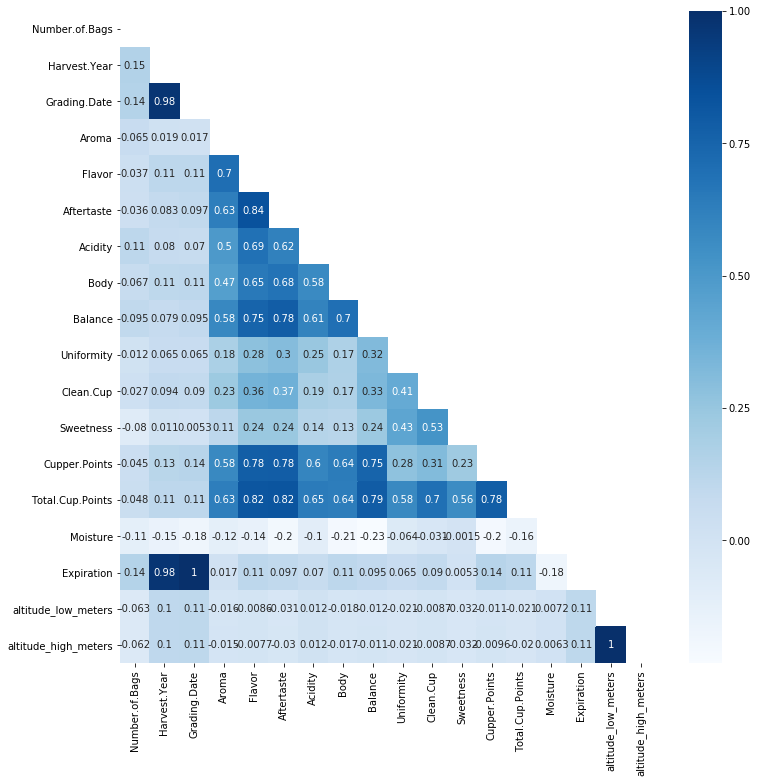

In [25]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(df.corr(), mask=mask, annot=True, cmap="Blues")

In [26]:
#eliminamos columnas con una corr mayor de 0.90
cols=['Grading.Date','Expiration','altitude_low_meters']
df.drop(cols, axis=1,inplace=True)

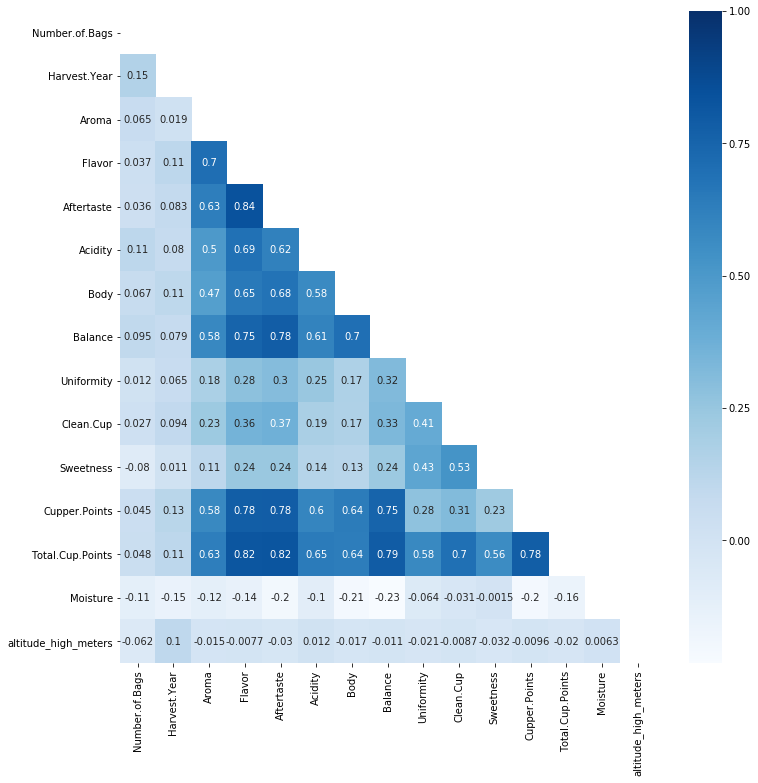

In [27]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(df.corr(), mask=mask, annot=True, cmap="Blues")

### Columna a predecir: Variety

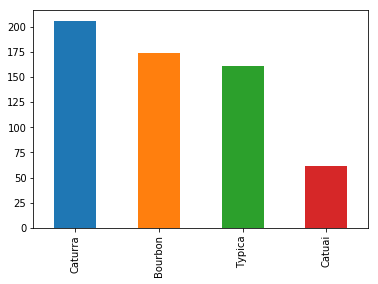

In [28]:
df.Variety.value_counts().plot.bar()

## Modelo 1:RandomForest

In [29]:
x_columns = [col for col in df if col != "Variety"]
X=pd.get_dummies(data=df[x_columns],drop_first=True)
y=pd.get_dummies(data=df['Variety'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Accuracy

In [31]:
cls_RandomForestClassifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores = cross_val_score(cls_RandomForestClassifier, X, y, cv=5)
"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

'Accuracy: 0.55 (+/- 0.07)'

In [32]:
cls_RandomForestClassifier.fit(X_train, y_train)
cls_RandomForestClassifier.score(X_test, y_test)

0.5527638190954773

In [33]:
y_pred = cls_RandomForestClassifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5527638190954773


In [34]:
actual_values = y_test.values.argmax(axis=1)
predictions = cls_RandomForestClassifier.predict(X_test).argmax(axis=1)

In [35]:
from sklearn.metrics import balanced_accuracy_score

print("Balanced Accuracy:",balanced_accuracy_score(actual_values, predictions))

Balanced Accuracy: 0.5793650793650793


### Precision,recall and F1 Score

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(actual_values, predictions,average=None)
recall = recall_score(actual_values, predictions,average=None)
f1_score = f1_score(actual_values, predictions,average=None)
print('precision: ', precision, 'recall: ',recall, 'f1_score: ', f1_score)

precision:  [0.47916667 0.66666667 0.79166667 0.76086957] recall:  [0.85185185 0.21428571 0.6031746  0.64814815] f1_score:  [0.61333333 0.32432432 0.68468468 0.7       ]


### Confusion Matrix

Confusion matrix, without normalization
[[46  0  2  6]
 [13  6  6  3]
 [21  2 38  2]
 [16  1  2 35]]


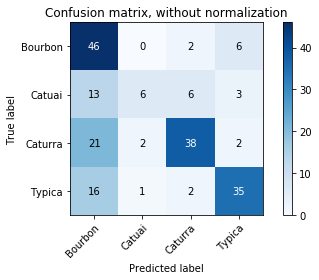

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

### ROC curve

In [38]:
# Binarize the output
y2 = label_binarize(y, classes=[0,1,2,3])
n_classes = y.shape[1]

In [39]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.33, random_state=42)

In [40]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
y2_score = classifier.fit(X_train, y2_train).predict(X_test)

In [41]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y2_test[:, i], y2_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [42]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y2_test.ravel(), y2_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [43]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [44]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [45]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


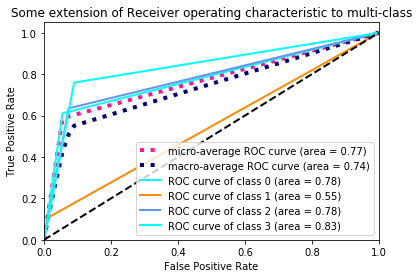

In [46]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Modelo 2: SVM.svc

In [47]:
cls_svc = OneVsRestClassifier(svm.SVC())
scores_svm = cross_val_score(cls_svc, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

Accuracy: 0.37 (+/- 0.13)


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [48]:
cls_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          n_jobs=None)

### Accuracy

In [49]:
y_pred = cls_svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4020100502512563


In [50]:
actual_values = y_test.values.argmax(axis=1)
predictions = cls_svc.predict(X_test).argmax(axis=1)

In [51]:
print("Balanced Accuracy:",balanced_accuracy_score(actual_values, predictions))

Balanced Accuracy: 0.4844576719576719


### Precision,recall and F1 Score

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_svm = precision_score(actual_values, predictions,average=None)
recall_svm = recall_score(actual_values, predictions,average=None)
f1_score_svm = f1_score(actual_values, predictions,average=None)
print('precision: ', precision, 'recall: ',recall, 'f1_score: ', f1_score)

precision:  [0.47916667 0.66666667 0.79166667 0.76086957] recall:  [0.85185185 0.21428571 0.6031746  0.64814815] f1_score:  <function f1_score at 0x113f66c80>


### Confusion matrix

Confusion matrix, without normalization
[[49  0  1  4]
 [17  7  3  1]
 [26  2 34  1]
 [41  0  0 13]]


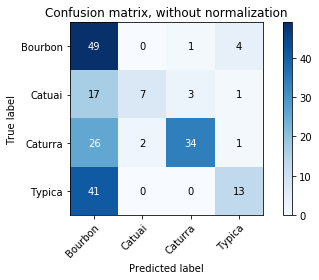

In [53]:
plot_confusion_matrix(actual_values, predictions, y.columns)

### ROC curve

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

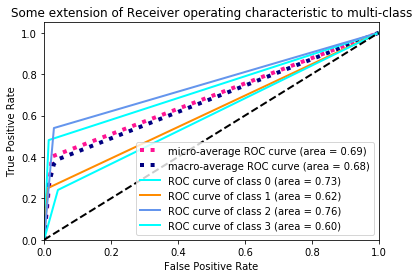

In [54]:
# Binarize the output
y5 = label_binarize(y, classes=[0,1,2,3])
n_classes = y5.shape[1]

y5_score = cls_svc.fit(X_train, y_train).predict(X_test)

X_train, X_test, y5_train, y5_test = train_test_split(X, y5, test_size=0.33, random_state=42)

classifier = OneVsRestClassifier(svm.SVC())
y5_score = classifier.fit(X_train, y5_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y5_test[:, i], y5_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y5_test.ravel(), y5_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Modelo 3: linear model

### Accuracy

In [58]:
cls_linear = OneVsRestClassifier(linear_model.LinearRegression())
scores = cross_val_score(cls_linear, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.08)


In [ ]:
cls_linear.fit(X_train, y_train)
cls_linear.score(X_test, y_test)

In [ ]:
y_pred = cls_linear.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
actual_values = y_test.values.argmax(axis=1)
predictions = cls_linear.predict(X_test).argmax(axis=1)

In [ ]:
print("Balanced Accuracy:",balanced_accuracy_score(actual_values, predictions))

### Precision,recall and F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(actual_values, predictions,average=None)
recall = recall_score(actual_values, predictions,average=None)
f1_score = f1_score(actual_values, predictions,average=None)
print('precision: ', precision, 'recall: ',recall, 'f1_score: ', f1_score)

### Confusion matrix

In [ ]:
plot_confusion_matrix(actual_values, predictions, y.columns)

### ROC curve

In [ ]:
# Binarize the output
y3 = label_binarize(y, classes=[0,1,2,3])
n_classes = y3.shape[1]

y3_score = cls_linear.fit(X_train, y_train).predict(X_test)

In [ ]:
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.33, random_state=42)

In [ ]:
classifier = OneVsRestClassifier(linear_model.LinearRegression())
y2_score = classifier.fit(X_train, y2_train).predict(X_test)

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y3_test[:, i], y3_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3_test.ravel(), y3_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [ ]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [ ]:
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Modelo 4: KNN

In [ ]:
cls_knn = KNeighborsClassifier(n_neighbors=3)
cls_knn.fit(X_train, y_train) 
KNeighborsClassifier()

### Accuracy

In [ ]:
cls_knn.score(X_test, y_test)

In [ ]:
y_pred = cls_knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
actual_values = y_test.values.argmax(axis=1)
predictions = cls_knn.predict(X_test).argmax(axis=1)

In [ ]:
print("Balanced Accuracy:",balanced_accuracy_score(actual_values, predictions))

### Precision,recall and F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(actual_values, predictions,average=None)
recall = recall_score(actual_values, predictions,average=None)
f1_score = f1_score(actual_values, predictions,average=None)
print('precision: ', precision, 'recall: ',recall, 'f1_score: ', f1_score)

### Confusion matrix

In [ ]:
plot_confusion_matrix(actual_values, predictions, y.columns)

### ROC curve

In [ ]:

# Binarize the output
y4 = label_binarize(y, classes=[0,1,2,3])
n_classes = y4.shape[1]

y4_score = cls_knn.fit(X_train, y_train).predict(X_test)

X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.33, random_state=42)

classifier = KNeighborsClassifier(n_neighbors=3)
y4_score = classifier.fit(X_train, y4_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y4_test[:, i], y4_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y4_test.ravel(), y4_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()